# Trabalho Kmeans
## dataset: análise e segmentação de clientes de um shopping

Colunas presentes no dataset:

- CustomerID: É o ID exclusivo dado a um cliente
- Gênero: Gênero do cliente
- Idade: a idade do cliente
- Renda Anual(k$): É a renda anual do cliente
- Pontuação de gastos: É a pontuação (de 100) dada a um cliente pelas autoridades do shopping, com base no dinheiro gasto e no comportamento do cliente.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports necessários

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 

## Leitura do dataset e análises estatísticas iniciais:

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


O dataset tem 5 colunas, sendo 4 numéricas e uma categórica nominal.

In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Olhando de maneira superficial, os dados fazem sentido:
- a idade mínima é de 18 anos, o que faz sentido e a idade máxima de 70. Idades super plausíveis.
- a renda anual mínima foi de \$ 15.000 e a máxima \$ 137.000, também dentro dos conformes.
- por fim, o intervalo de quanto se gasta na ida ao shopping desses clientes ficou entre \$ 1 e \$ 99, o intervalo proposto na feature. De acordo.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Com essa informação vemos que não temos dados faltantes.
Além disso, podemos observar com o comando describe() acima que não temos valores = 0 (eles apareceriam no 'mínimo'). Isso é bom porquê às vezes os valores = 0 podem atrapalhar as análises.

In [7]:
print(f"Média da idade dos clientes do shopping: {round(df['Age'].mean())}")
print(f"Média de renda anual dos clientes do shopping: {df['Annual Income (k$)'].mean()}")
print(f"Média de gasto dos clientes do shopping: {df['Spending Score (1-100)'].mean()}")

Média da idade dos clientes do shopping: 39
Média de renda anual dos clientes do shopping: 60.56
Média de gasto dos clientes do shopping: 50.2


## Análise Exploratória

Primeira coisa, vamos observar a diferença do comportamento dos clientes homens e mulheres.

A começar que temos mais mulheres no dataset:

In [8]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

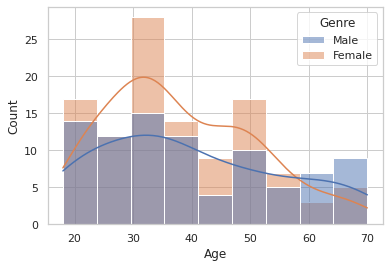

In [10]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="Age", hue="Genre", kde=True)

Olhando o histograma acima, podemos perceber que no geral há mais mulheres com 20 a 60 anos: ou seja, contando todas as pessoas que tem entre 20 e 60 anos, a maioria é mulher. Isso é bem razoável pensando que há mais mulheres no dataset.

Entretanto, as pessoas de idade que frequentam o shopping são em sua maioria homens, ou seja, há mais idosos (acima de 60 anos) que idosas na base. Entretanto, a idade predominante dos homens na base é entre30 e 35 anos.

In [11]:
print("Idade média dos homens que frequentam o shopping: ")
print(df.query('Genre == "Male"')['Age'].mean())
print("Idade média das mulheres que frequentam o shopping: ")
print(df.query('Genre == "Female"')['Age'].mean())

Idade média dos homens que frequentam o shopping: 
39.80681818181818
Idade média das mulheres que frequentam o shopping: 
38.098214285714285


Apesar da média ser próxima para os dois gêneros, podemos observar pelo histograma que o comportamento é diferente.

Vamos confirmar com o desvio padrão e a mediana:

In [12]:
print("Mediana da idade dos homens que frequentam o shopping: ")
print(df.query('Genre == "Male"')['Age'].median())
print("Mediana da idade das mulheres que frequentam o shopping: ")
print(df.query('Genre == "Female"')['Age'].median())

Mediana da idade dos homens que frequentam o shopping: 
37.0
Mediana da idade das mulheres que frequentam o shopping: 
35.0


A mediana é uma métrica que divide os dados no meio, ou seja, separa a metade maior e a menor. Estatisticamete, não deu para confirmar muita coisa, mas temos uma hipóteses de que por conta da média das mulheres ser de 38 e a mediana de 35, há mais mulheres com menos de 35 anos do que com mais na base.

À confirmar:

In [13]:
print(f'Número de mulheres com 35 anos ou menos: {df.loc[(df["Genre"]=="Female") & (df["Age"]<= 35)]["CustomerID"].count()}')
print(f'Número de mulheres com 36 anos ou mais: {df.loc[(df["Genre"]=="Female") & (df["Age"]>= 36)]["CustomerID"].count()}')
print(f'Número de mulheres com 35 anos: {df.loc[(df["Genre"]=="Female") & (df["Age"]== 35)]["CustomerID"].count()}')

Número de mulheres com 35 anos ou menos: 57
Número de mulheres com 36 anos ou mais: 55
Número de mulheres com 35 anos: 6


É bem pouquinho, mas de fato há mais mulheres com menos de 35 do que com mais.

In [14]:
print("Desvio padrão da idade dos homens que frequentam o shopping: ")
print(df.query('Genre == "Male"')['Age'].std())
print("Desvio padrão da idade das mulheres que frequentam o shopping: ")
print(df.query('Genre == "Female"')['Age'].std())

Desvio padrão da idade dos homens que frequentam o shopping: 
15.514811576858186
Desvio padrão da idade das mulheres que frequentam o shopping: 
12.644095457392353


O desvio padrão revela que a idade das mulheres varia menos, ou seja, a idade das mulheres é mais perto da média feminina, tem menos valores distantes de 38 anos.

Já o desvio padrão masculino indica que há maior variabilidade na idade.

Vamos observar a renda anual dos clientes agora:

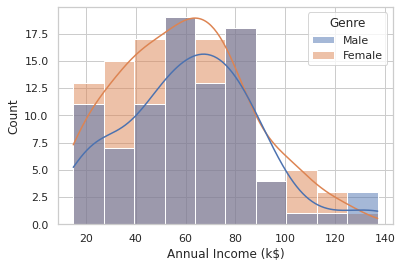

In [15]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="Annual Income (k$)", hue="Genre", kde=True)

No geral, é cabível dizer que as mulheres recebem melhor do que os homens nessa base. Isso pode ser por conta de haver mais mulheres ou não, mas de acordo com o gráfico, para salários anuais de até \$ 50 mil, as mulheres recebem mais. Salários no intervalo de \$ 50 a \$ 60 e de \$ 70 a \$ 100, os homens recebem mais e por fim salários maiores que \$ 100 e menores que \$ 130 as mulheres voltam a estar na frente.

Vamos observar somado quem recebeu mais no período da base:

In [16]:
print("Renda anual total masculina no período da base: ")
print(df.query('Genre == "Male"')['Annual Income (k$)'].sum())
print("Renda total feminina no período da base: ")
print(df.query('Genre == "Female"')['Annual Income (k$)'].sum())

Renda anual total masculina no período da base: 
5476
Renda total feminina no período da base: 
6636



Na base, as mulheres ganham mais dinheiro que os homens anualmente. Pode ser, novamente, por conta de haver mais mulheres no dataset, então não se pode afirmar muita coisa por hora.

Vamos ver na média quanto ganha anualmente cada gênero:



In [17]:
print("Renda anual média masculina no período da base: ")
print(df.query('Genre == "Male"')['Annual Income (k$)'].mean())
print("Renda média feminina no período da base: ")
print(df.query('Genre == "Female"')['Annual Income (k$)'].mean())

Renda anual média masculina no período da base: 
62.22727272727273
Renda média feminina no período da base: 
59.25


De fato, a média nos leva a crer que a soma do salário anual das mulheres é maior que o dos homens por haver mais mulheres na base, não por elas receberem mais. Entretanto, o gráfico que melhor explicou esse comportamento foi o histograma algumas células acima.

Interessante. Agora vamos observar a última feature para avaliar quem gasta mais.

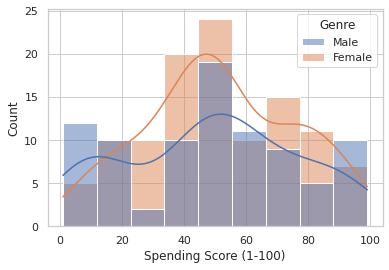

In [18]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="Spending Score (1-100)", hue="Genre", kde=True)

Ao que os dados mostram, os homens gastam mais até \$ 20 do que as mulheres, ou seja, os homens consomem mais produtos baratos que as mulheres.

As mulheres praticamente lideram em gastos de \$ 20 a \$ 90. Gastos acima de \$ 90 os homens voltam a gastar mais e consumir produtos caros.

Vamos ver quem gasta mais somado:

In [19]:
print("Gastos totais masculinos no período da base: ")
print(df.query('Genre == "Male"')['Spending Score (1-100)'].sum())
print("Gastos totais femininos no período da base: ")
print(df.query('Genre == "Female"')['Spending Score (1-100)'].sum())

Gastos totais masculinos no período da base: 
4269
Gastos totais femininos no período da base: 
5771


As mulherers gastaram mais dinheiro no shopping que os homens.
Novamente, há mais mulheres no dataset, então vamos ver quanto uma mulher e um homem gastam na média, ai elimina-se a interferência da quantidade em nossa análise:

In [20]:
print("Gastos totais masculinos no período da base: ")
print(df.query('Genre == "Male"')['Spending Score (1-100)'].mean())
print("Gastos totais femininos no período da base: ")
print(df.query('Genre == "Female"')['Spending Score (1-100)'].mean())

Gastos totais masculinos no período da base: 
48.51136363636363
Gastos totais femininos no período da base: 
51.526785714285715


De fato, mesmo tendo mais mulheres na base, elas gastam mais dinheiro no shopping na média do que os homens.

Vamos analisar agora se pessoas que recebem mais anualmente tendem a gastar e se existe alguma relação entre quanto se ganha e quanto se gasta:

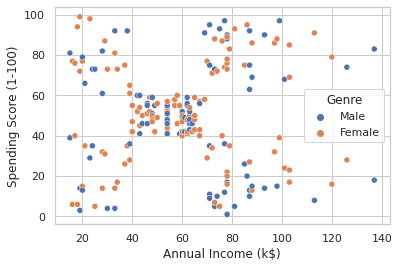

In [21]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre")

Não parece haver uma regra muito clara.

Existem pessoas que recebem pouco anualmente e gastam muito e também pessoas que recebem muito e gastam pouco. Entretanto, a impressão que dá é que existem mais pessoas com menor renda que gastam muito do que pessoas com muita renda anual que gastam muito. No geral, visualmente, os dados nos levam a crer que pessoas com maior renda gastam menos. No quesito gênero, o comportamento apareceu bem distribuído. 

Vamos avançar nessas análises:

In [22]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

A média de renda anual dos clientes no shopping, para homens e mulheres, é de \$ 60k, mas o desvio é bem alto, de \$ 26k, o que indica que esse valor varia bastante.

Além disso, a maioria das pessoas recebe entre \$ 41.5k e \$ 78k, valores esses representantes do primeiro e terceiro quartil, respectivamente.

In [23]:
df.rename(columns = {'Annual Income (k$)':'Annual_Income'}, inplace = True)

Vamos segmentar a renda anual por quanto as pessoas gastam e ver se encontramos uma relação:

In [27]:
lista = [20, 40, 60, 80, 100, 120, 140]
for x in lista:
  print(f"Gasto médio para renda anual inferior a $ {x} mil anuais:")
  print(df.query(f'Annual_Income < {x}')['Spending Score (1-100)'].mean())

Gasto médio para renda anual inferior a $ 20 mil anuais:
50.583333333333336
Gasto médio para renda anual inferior a $ 40 mil anuais:
49.73913043478261
Gasto médio para renda anual inferior a $ 60 mil anuais:
50.23913043478261
Gasto médio para renda anual inferior a $ 80 mil anuais:
50.117283950617285
Gasto médio para renda anual inferior a $ 100 mil anuais:
50.306451612903224
Gasto médio para renda anual inferior a $ 120 mil anuais:
50.21649484536083
Gasto médio para renda anual inferior a $ 140 mil anuais:
50.2


Não foi muito conclusivo, até porque clientes que tem renda anual alta ou gastaram muito dinheiro ou pouco e com isso fez com que o ticket médio ficasse na média mesmo.

Por mais que seja praticamente insiginificamente, clientes com renda anual menor que \$ 20k, os que menos recebem, gastaram \$ 1 a mais em comparação aos outros. Interessante.

Vamos ver por número de compras:

In [28]:
for x in lista:
  print(f"Número de compras total para renda inferior a $ {x} mil anuais:")
  print(df.query(f'Annual_Income < {x}')['Spending Score (1-100)'].count())

Número de compras total para renda inferior a $ 20 mil anuais:
12
Número de compras total para renda inferior a $ 40 mil anuais:
46
Número de compras total para renda inferior a $ 60 mil anuais:
92
Número de compras total para renda inferior a $ 80 mil anuais:
162
Número de compras total para renda inferior a $ 100 mil anuais:
186
Número de compras total para renda inferior a $ 120 mil anuais:
194
Número de compras total para renda inferior a $ 140 mil anuais:
200


Já deu pra ver que pessoas que ganham acima de \$ 120 mil foram as compras apenas 6 vezes (200 - 194). Na verdade, dos 200 registros do dataset, apenas 14 compras foram realizadas por pessoas com mais de \$ 100 mil.

Em compensação, pessoas que faturam anualmente entre \$ 80k e \$ 60k foram os que mais compraram, um total de 70 vezes.

Além disso, confirmamos que pessoas com maior renda anual compraram menos.

Por fim, vamos ver qual a idade das pessoas de maior fortuna na base:

In [29]:
lista2 = [18, 25, 32, 39, 46, 53, 60, 67]
for x in lista2:
  print(f"Renda anual de pessoas entre {x} e {x+7} anos:")
  print(round(df.query(f'Age in [{x}, {x+7}]')['Annual_Income'].mean()))

Renda anual de pessoas entre 18 e 25 anos:
54
Renda anual de pessoas entre 25 e 32 anos:
81
Renda anual de pessoas entre 32 e 39 anos:
84
Renda anual de pessoas entre 39 e 46 anos:
66
Renda anual de pessoas entre 46 e 53 anos:
51
Renda anual de pessoas entre 53 e 60 anos:
42
Renda anual de pessoas entre 60 e 67 anos:
45
Renda anual de pessoas entre 67 e 74 anos:
46


Divide os dados de 7 em 7 na idade, ou seja, idade de 18 a 25, de 25 a 32 e assim por diante.

Podemos observar que o intervalo que mais ganha dinheiro é o de 32 a 39 anos, seguido por 25 a 32. A menor renda é das pessoas entre 53 e 60 anos. E mesmo as pessoas entre 53 e 60 anos consomem bastante, como vimos nos gráficos acima.

Para criar os clusters, vamos pensar da seguinte maneira.

Cada época é marcada por determinados acontecimentos culturais, políticos, sociais e econômicos que impactam o contexto de vida, a visão de mundo e a forma de se relacionar das pessoas que nascem e vivem em determinado período. Impactam, também, portanto, em como essas pessoas consomem produtos.

Essa é ideia que embasa a divisão por grupos geracionais e será por meio dela que criaremos os clusters.

Não há um consenso sobre o ano em que começa e termina cada um, mas uma divisão possível é Baby Boomers (nascidos entre 1946 e 1964), Geração X (1965-1980), Geração Y ou Millennials (1981-1996) e Geração Z (1997-2010). Há ainda a Geração Alfa, que compreende os nascidos a partir de 2010.

Assim, criaremos 4 clusters:
- Baby Boomers (58 a 76 anos)
- Geração X (42 a 57 anos)
- Geração Y (Millenials) (26 a 41 anos)
- Geração Z (12 a 25 anos)

Não vamos incluir a geração Alfa porquê essa geração ainda não chegou na maioridade e os dados partem de 18 anos de idade, não faria sentido.

É claro que esse foi um de vários possíveis jeitos de se chegar ao número de clusters (k). Vamos ver se a idade vai ser de fato um fator segmentante nos dados e se idades nesses intervalos vão ficar no mesmo cluster ou não. Aparentemente existe, de acordo com nossa análise exploratória, uma relação considerável entre idade e os gastos e ganhos.

Antes vamos passar a feature Gênero para numérico e, por ser uma coluna categórica binária podemos comverter para 0 e 1.

In [30]:
df['Genre'].replace({"Male": 0, "Female": 1}, inplace=True)

In [31]:
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Vamos tirar também a coluna de ID da análise que não ajuda em nada e só vai atrapalhar.

In [32]:
kmeans = KMeans(n_clusters = 4) 
pred_y = kmeans.fit_predict(df.drop(['CustomerID'], axis=1))
df['clusters'] = pred_y

In [33]:
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending Score (1-100),clusters
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,3
3,4,1,23,16,77,0
4,5,1,31,17,40,3


Vamos ver os resultados:

In [34]:
print(pred_y)

[0 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Vamos avaliar agora e ver se a segmentação de fato está agrupando os dados como esperávamos:

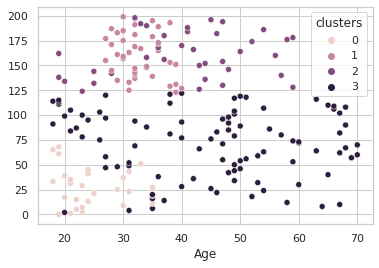

In [35]:
sns.scatterplot(data=df, x="Age", y=df.index, hue="clusters")

Ao analisarmos a variável 'Age', variável essa em que nos baseamos para definir o número de clusters, vemos que existe uma relação entre os clusters e a idade, mas não muito claro.

Por exemplo, aparentemente, clusters = 2 tem idade superior a 40 anos, mas ainda tem bastante representantes com idades fora desse padrão.

Clusters = 3 seriam a geração mais nova, com a maioria dos representantes tendo entre 18 e 30 anos e mais bem segmentada.

Clusters = 1 seriam os de meia idade, entre ~25 e ~40 anos, mas ainda bem divididos.

Por fim os clusters = 0 são os que mais oscilam na base e esse grupo tem todas as idades.

Vamos para a próxima variável:

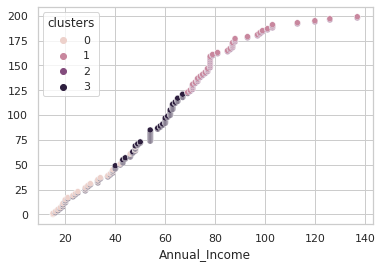

In [36]:
sns.scatterplot(data=df, x="Annual_Income", y=df.index, hue="clusters")

A variável de renda anual parece mais bem definida. É muito claro que o cluster=3 apresenta menor renda, com a maioria dos representantes tendo renda anual de ~15 mil até ~40 mil. 

Clusters = 0 oscilam entre ~ 40 e 65 ~ mil enquanto clusters=1 seriam de 65 mil adiante, dividindo os valores mais altos com o cluster=2.

Ainda não ficou muito bem segmentado, mas melhor que a idade visualmente.

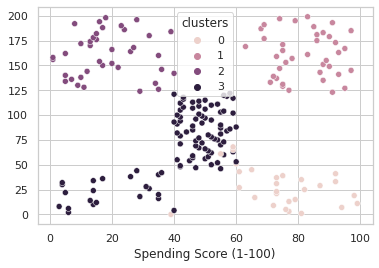

In [37]:
sns.scatterplot(data=df, x="Spending Score (1-100)", y=df.index, hue="clusters")

A variável de gastos no shopping está super bem segmentada: é nítido que cada grupo (cluster) gasta de maneira diferente.

Os clusters=1, por exemplo, costumam gastar mais, valores superiores a 60 dólares.

Clusters=0 gastam entre 40 e 60, embora tenham representantes que gastem menos que isso. Mais que isso, não tem. 

Clusters=3 gastam acima de 60 também, mas são classificados de outra maneira. Interessante.

Por fim, os que foram classificados como clusters=2 são os que menos gastam e apesar de dividir valores com alguns clintes clusters=0,foram segmentados de outra maneira.

Essa foi a variável que deixou mais claro os perfis de clientes encontrados.

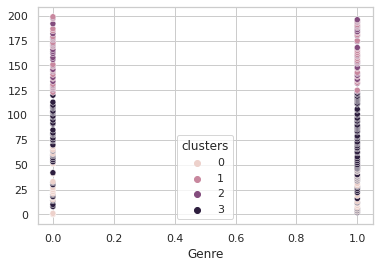

In [38]:
sns.scatterplot(data=df, x="Genre", y=df.index, hue="clusters")

Quanto ao gênero, não é possível concluir muita coisa a não ser que existe homens e mulheres bem distribuídos nos 4 perfis de clientes estabelecidos e que não existe, pelo menos não de maneira muito clara, algo que diferencie uma mulher e um homem em termos de idade, gasto e renda anual para o algoritmo e segmentação.

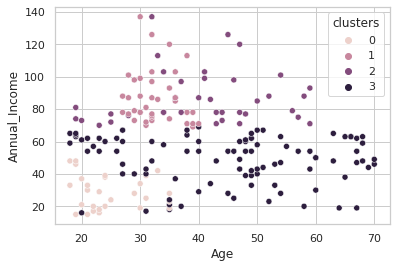

In [39]:
sns.scatterplot(data=df, x="Age", y="Annual_Income", hue="clusters")

Podemos ainda misturar as variáveis e observar o comportamento integrado.

No exemplo acima fica visível que clientes com perfil 3 (clusters=3) são os mais novos e com menor renda anual; perfis 0 oscilam entre todas as idades, mas anualmente não recebem mais que ~65 mil dólares. Os clientes com perfil 1 e 2 são os que mais recebem anualmente e, por incrivel que pareça, não são os mais velhos, mas sim pessoas entre 30 e 45 anos para os perfis = 1, e entre 25 e 60 para os perfis = 2, a grosso modo.

In [40]:
df.groupby(['clusters']).count()

,CustomerID,Genre,Age,Annual_Income,Spending Score (1-100)
clusters,,,,,
0,28,28,28,28,28
1,39,39,39,39,39
2,38,38,38,38,38
3,95,95,95,95,95


Observando a fundo, descobrimos que existem:
- 95 clientes do tipo 0
- 39 do tipo 1
- 38 do tipo 2
- 28 do tipo 3

Além disso:

In [41]:
df.groupby(['clusters']).mean()

,CustomerID,Genre,Age,Annual_Income,Spending Score (1-100)
clusters,,,,,
0,28.642857,0.500000,24.821429,28.714286,74.250000
1,162.000000,0.538462,32.692308,86.538462,82.128205
2,162.000000,0.473684,40.394737,87.000000,18.631579
3,71.831579,0.621053,44.894737,48.705263,42.631579


Na média, o cliente do tipo 0 tem 24 anos, recebe anualmentte 28 mil dólares e gasta bastante, 72 dólares. Esse cliente pode ser tanto homem quanto mulher, literalmente tem 50% de chance de ser um ou outro.

Já o cliente do tipo 3 tem em média 44 anos e gasta consideravelmete menos: 42 dólares apenas por ida no shopping. Além disso, esse cliente recebe anualmente quase o dobro do tipo 3, cerca de 48 mil dólares. De maneira interessante, descobrimos ainda que esse cliente tende a ser mulher (mulher = 1 e homem = 0). Ou seja, a cada 100 pessoas do perfil 1, há aproximadamente 62 mulheres e apenas 38 homens. Muito bacana.

O perfil 1 tende a ser mulher também, mas é praticamente igual o número de homens e mulheres. A idade média é de 32 anos e a renda é a maior da base, 86 mil dólares anuais. Por fim, é esse perfil o que mais gasta no shopping também, cerca de 82 dólares por ida. No fim das contas existia uma relação entre quanto uma pessoa ganha e quanto ela: quem ganha bem gasta mais mesmo, pelo menos de acordo com a segmentação. Agora, quem mais ganha na base é quem gasta menos como veremos a seguir:

O último perfil, o do tipo 2, tem a idade média de 40 anos e gasta na ida ao shopping em média 18 dólares, são os que gastam menos. Sua maioria é homem, mas também é um grupo bem heterogêneo (porquê a média está abaixo de 0.5 e mais perto de 0 (homem), portanto). Além disso, é o grupo com maior renda, recebendo em média 87 mil dólares por ano. Interessante que o grupo que mais ganha é o que menos gasta, achei contra-intuitivo. Legal.

Vamos observar agora qual é o cluster mais homogêneo, ou seja, com características de fato parecidas. Para isso vamos avaliar o desvio padrão médio: se o desvio for baixo, significa que a maioria dos dados encontra-se muito perto da média e portanto os valores são parecidos e o cluster homogêneo. Um desvio padrão muito grande nos mostra que há muitos valores significativamente maiores ou menores que a média e que o grupo não é tão homogêneo assim:

In [42]:
df.groupby(['clusters']).std()

,CustomerID,Genre,Age,Annual_Income,Spending Score (1-100)
clusters,,,,,
0,19.235797,0.509175,5.571446,10.384665,14.075524
1,22.803509,0.505035,3.728650,16.312485,9.364489
2,22.226111,0.506009,11.376931,16.271348,10.915947
3,33.379396,0.487699,15.341831,14.522817,14.713616


Com relação a idade, os perfis mais homogêneos são os tipo 1 e 2, sendo que o 1 é o mais. Isso siginfica que o grupo 1, que em média tem 32 anos tem em sua vasta maioria pessoas com idade muito próxima a isso. Em compensação, o grupo de pessoas do perfil 0, que tem em média 44 anos, apresenta pessoas do grupo com até 15 anos de diferença, para mais ou menos. 

Com relação a renda anual, o desvio padrão foi no geral alto, ou seja, essa característica varia bastante entre os clusters, assim como quanto essas pessoas gastam, apesar das médias diferirem. Nesses casos, é possível e provável que haja poucos casos que fogem muito à média, mas esses casos são significantes a ponto de influenciar o desvio padrão.